# QR code reader

In [1]:
from pyzbar.pyzbar import decode
import cv2 as cv
import numpy as np

from PIL import Image
import io
import requests

In [2]:
raw_data=requests.get('https://chart.googleapis.com/chart?cht=qr&chl=http%3A%2F%2Fhi%20this%20is%20testing%20of%20qr%20code.&chs=180x180&choe=UTF-8&chld=L|2',stream=True).content

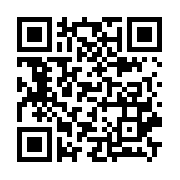

In [4]:
Image.open(io.BytesIO(raw_data))

In [4]:
img=Image.open(io.BytesIO(raw_data))

In [5]:
decode(img)

[Decoded(data=b'http://hi this is testing of qr code.', type='QRCODE', rect=Rect(left=16, top=16, width=146, height=146), polygon=[Point(x=16, y=16), Point(x=16, y=162), Point(x=162, y=162), Point(x=162, y=16)])]

In [6]:
img1=np.array(img)

In [7]:
type(img1)

numpy.ndarray

In [8]:
p=decode(img1)

In [9]:
p[0].data.decode()

'http://hi this is testing of qr code.'

In [10]:
x,y,w,h=p[0].rect

In [11]:
a=p[0].rect

In [12]:
a

Rect(left=16, top=16, width=146, height=146)

In [13]:
a[0]

16

In [14]:
cam=cv.VideoCapture(0)
count=0

while True:
    count+=1
    _,frame=cam.read()
    p=decode (frame)
    cv.imshow("QR code detect",frame)
    if p:
        x,y,w,h=p[0].rect
        img1=cv.rectangle(frame,(x,y),(x+w,y+h),(255,255,0),5)
        q=p[0].data.decode()
        font=cv.FONT_HERSHEY_SIMPLEX
        cv.putText(img1,q,(x,y-10),font,2,cv.LINE_AA)
        cv.imshow("QR code detect",frame)
    
    key=cv.waitKey(1)
    if key==ord('q'):
        cv.destroyAllWindows()
        break
cam.release() 